In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import scipy.stats as scipyStats
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.preprocessing import StandardScaler, RobustScaler   #MODULE FOR SCALING DATA
import seaborn as sb
import imblearn
##IMPORTING ALL THE LIBRARIES WE WILL NEED FOR THIS PROJECT

Using TensorFlow backend.


# IMPORTING THE DATA

In [3]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv") ## TO READ THE CSV FILE creditcard.csv WHICH CONTAINS OUR DATA

# **DATA EXPLORATION**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.isnull().sum() ## TO CHECK THE TOTAL NUMBER OF NULL VALUES IN EVERY COLUMN. OUTPUT SAYS NO NULL VALUES

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# DATA VISUALIZATION

In [7]:
class_values = df["Class"].value_counts()
count_0 = class_values[0] ## STORE THE COUNT OF 0 IN THE VARIABLE
count_1 = class_values[1] ## STORE THE COUNT OF 1 IN THE VARIABLE
count_0_percent = ((count_0)/(count_0+count_1))*100 ##CALCULATE THE PERCENTAGES OF THE 0's AND 1's IN THE TOTAL DATA SET
count_1_percent = ((count_1)/(count_0+count_1))*100
class_values

0    284315
1       492
Name: Class, dtype: int64

**The count shows that the dataset is highly biased towards not fraud transactions which is obvious in the real world as the total number of fraudulent transactions are less in comparison with the fraudulent transactions.**

**PLOTTING THE FRAUD AND NOT FRAUD BAR CHART TO EASE THE PROCESS OF DATA EXPLORATION**

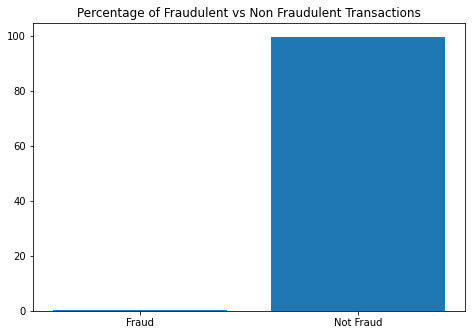

In [8]:
fig = mpl.figure()
ax = fig.add_axes([0,0,1,1])
Class_labels = ["Fraud","Not Fraud"]
percentages = [count_1_percent,count_0_percent]
ax.bar(Class_labels,percentages)
mpl.title("Percentage of Fraudulent vs Non Fraudulent Transactions")
mpl.show()

**PLOT TO SEE THE DISTRIBUTION OF TRANSACTIONS**

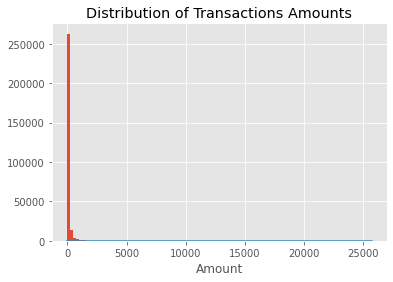

In [9]:
amount_value = df["Amount"].value_counts()
mpl.style.use('ggplot')
mpl.hist(df["Amount"],bins=100)
mpl.title("Distribution of Transactions Amounts")
sb.distplot(df["Amount"])
mpl.show()

**SCATTERPLOT OF TRANSACTIONS VS. CLASSES**




<function matplotlib.pyplot.show(*args, **kw)>

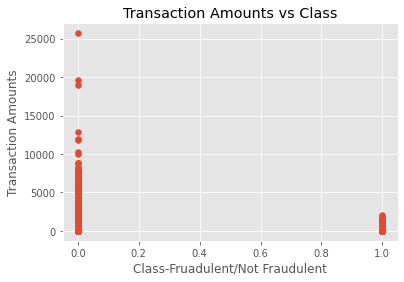

In [10]:
mpl.scatter(df["Class"].values, df["Amount"].values)
mpl.title("Transaction Amounts vs Class")
mpl.xlabel("Class-Fruadulent/Not Fraudulent")
mpl.ylabel("Transaction Amounts")
mpl.show

**HISTOGRAM OF DISTRIBUTION OF THE TIME OF TRANSACTIONS**

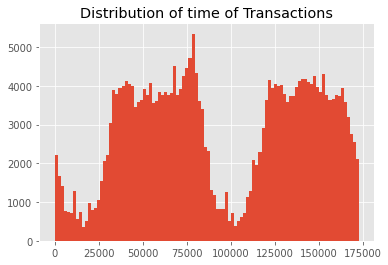

In [11]:
mpl.style.use('ggplot')
mpl.hist(df["Time"],bins=100)
mpl.title("Distribution of time of Transactions")
mpl.show()

# DATA PREPARATION

**Since the time column in the dataset plays no significant role in predicting whether the transaction is fraudulent or not, we remove it from the data set.**

In [12]:
df_without_time = df.iloc[:,1:31]  ##REMOVING THE TIME COLUMN BECAUSE DOESNOT GIVE ANY SIGNIFICANT INSIGHTS
df_without_time.head() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**INSIGHTS INTO CORRELATIONS BETWEEN THE SCALED DATA**

In [13]:
df_corr = df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


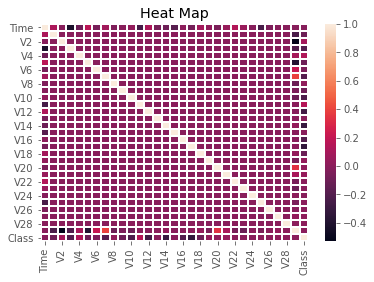

In [14]:
map = sb.heatmap(df_corr, linewidth = 1.0)
mpl.title("Heat Map")
mpl.show()

**SCALING OF DATA IN THE DATA FRAME**

**Scaling of data is a very important process in the preparation of the data set that has to be used in the prediction algorithms. In our case,we are using a robust sampler. Robust sampler is very effective in terms of removing the outliers. Presence of outliers can lead to change in the decision boundary further affecting the prediction of the data.**

In [15]:
scaler = RobustScaler().fit(df_without_time.iloc[:,:-1])
scaler.transform(df_without_time.iloc[:,:-1])
df_without_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**CONVERTING INTO CATEGORICAL VARIABLES**

In [16]:
df_without_time["Class"] = df_without_time["Class"].astype("category")
df_without_time["Class"] = df_without_time["Class"].cat.rename_categories({0:"Not Fraud",1:"Fraud"})
df_without_time["Class"]

0         Not Fraud
1         Not Fraud
2         Not Fraud
3         Not Fraud
4         Not Fraud
            ...    
284802    Not Fraud
284803    Not Fraud
284804    Not Fraud
284805    Not Fraud
284806    Not Fraud
Name: Class, Length: 284807, dtype: category
Categories (2, object): [Not Fraud, Fraud]

SPLITTING DATA INTO 70%-30% AS TRAINING AND TESTING DATA SETS

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Output_para = df_without_time.iloc[:,:30] ## SEPARATING OUTPUT AND INPUT PARAMETER COLUMNS
Input_parameters = df_without_time.iloc[:,0:29]
Output_parameter = Output_para.iloc[:,-1]
Output_parameter.value_counts()

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64

In [19]:
Data_train, Data_test, Class_train, Class_test = train_test_split(Input_parameters,Output_parameter, test_size=0.3, random_state=100)

In [20]:
print(Class_train.value_counts())

Not Fraud    199014
Fraud           350
Name: Class, dtype: int64


In [21]:
print("Test Data Size: ",Data_test.shape)
print("Training Data Size: ", Data_train.shape)
print("Training Data Output Data Size: ", Class_train.shape)
print("Testing Data Output Size: ", Class_train.shape)

Test Data Size:  (85443, 29)
Training Data Size:  (199364, 29)
Training Data Output Data Size:  (199364,)
Testing Data Output Size:  (199364,)


# DATA SAMPLING

Data sampling is the process of making the dataset unbiased. As we have seen in Data Exploration that the number of fraudulent transactions as very few as compared to the non-fraudulent transactions. If we use the same data set for the predictions, the model will predict all the transactions as non-fraudulent in the future, which can have adverse effect on the further processes. 

Therefore, we will sample the data in different ways and make it unbiased. To do so, we will be using the following algorithms:
1. Random Sampler(UP-Sampling, Down-Sampling 
2. SMOTE
3. NEAR-MISS

RANDOM SAMPLER

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**RANDOM SAMPLER - DOWN SAMPLING**

In [23]:
random_under = RandomUnderSampler(sampling_strategy = 'auto')
Data_under_sampled, Class_under_sampled = random_under.fit_resample(Data_train, Class_train)
Data_under_sampled.shape

(700, 29)

**RANDOM SAMPLER - UP SAMPLING**

In [24]:
random_over = RandomOverSampler(sampling_strategy = 'auto')
Data_over_sampled, Class_over_sampled = random_over.fit_resample(Data_train, Class_train)
Class_over_sampled.shape

(398028,)

**SMOTE SAMPLING**

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
oversample = SMOTE()
Smote_Data_train,Smote_class_train = oversample.fit_resample(Data_train,Class_train) 
Smote_Data_train.shape

(398028, 29)

**NEAR-MISS SAMPLING**

In [27]:
from imblearn.under_sampling import NearMiss

In [28]:
sample = NearMiss()
Data_NM_train,Class_NM_train = sample.fit_resample(Data_train,Class_train)
Class_NM_train.shape

(700,)

# ROC AUC PLOT AND CALCULATION

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
1. True Positive Rate
2. False Positive Rate
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0 and one whose predictions are 100% correct has an AUC of 1.0.

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import tree 

In [30]:
auc_values = []
def calc_auc(clf):
    probs = clf.predict_proba(Data_test)
    probs = probs[:,1]
    auc_calc = round(roc_auc_score(Class_test, probs),2)
    auc_values.append(auc_calc)
    fpr, tpr, thresholds = roc_curve(Class_test,probs, pos_label='Not Fraud')
    mpl.plot(fpr, tpr, color='red', label='ROC')
    mpl.plot([0, 1], [0, 1], color='DarkBlue', linestyle='--')
    mpl.title("Receiver Operating Characteristic (ROC) Curve")
    mpl.xlabel("False Positive Rate")
    mpl.ylabel("True Positive Rate")
    mpl.legend()
    mpl.show()
    return auc_calc

**1. FOR ORIGINAL DATA SET**

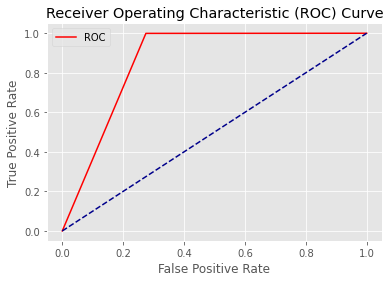

AUC is:  0.86


In [31]:
clf = tree.DecisionTreeClassifier()
    #for original training dataset
clf = clf.fit(Data_train, Class_train)
print("AUC is: ",calc_auc(clf))

2. **FOR UP SAMPLED DATA SET(RANDOM SAMPLER)**

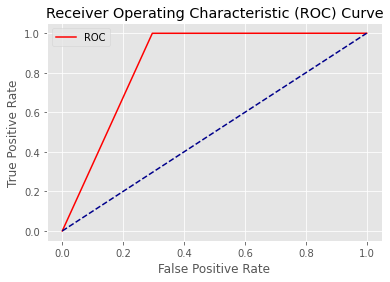

AUC is:  0.85


In [32]:
clf = tree.DecisionTreeClassifier()

#for original training dataset
clf = clf.fit(Data_over_sampled, Class_over_sampled)
auc = calc_auc(clf)
print("AUC is: ",auc)

3. **FOR DOWN SAMPLED USING RANDOM SAMPLER**

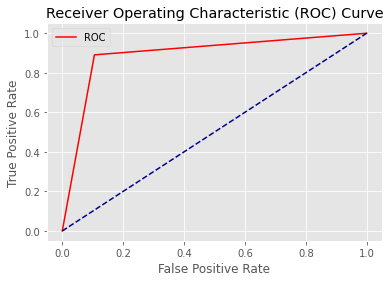

AUC is:  0.89


In [33]:
clf = tree.DecisionTreeClassifier()
#for original training dataset
clf = clf.fit(Data_under_sampled, Class_under_sampled)
auc = calc_auc(clf)
print("AUC is: ",auc)

4. **FOR SMOTE SAMPLING**

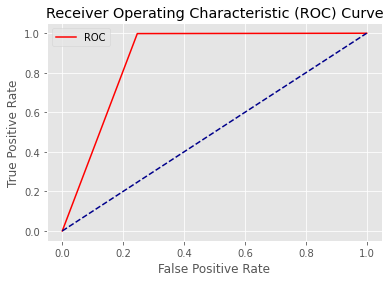

AUC is:  0.88


In [34]:
clf = tree.DecisionTreeClassifier()
#for original training dataset
clf = clf.fit(Smote_Data_train,Smote_class_train)
auc = calc_auc(clf)
print("AUC is: ",auc)

5. **FOR NEAR MISS DATA SAMPLING**

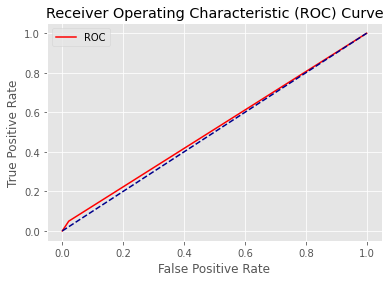

AUC is:  0.51


In [35]:
clf = tree.DecisionTreeClassifier()
#for original training dataset
clf = clf.fit(Data_NM_train,Class_NM_train)
auc = calc_auc(clf)
print("AUC is: ",auc)

# MACHINE LEARNING ALGORITHMS TO PREDICT

Looking at the preformances by the data sets sampled by various sampling techniques, we found out that the best performance is given by the data set which is down sampled by the Random Sampler. The AUC score is 0.91. Therefore we will use the various machine learning algorithms to predict the outputs. The algorithms we are using are:
1. Logistic Regression
2. Random Forests
3. K- Nearest Neighbours
4. XG Boost

**TESTING VARIOUS ALGORITHMS**

In [36]:
from sklearn.linear_model import LogisticRegression #linear regression
from sklearn.svm import SVC #svc
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.metrics import classification_report 
import xgboost as xgb #XGBoost

##IMPORTING ALL THE ALGORITHMS

1. LOGISTIC REGRESSION

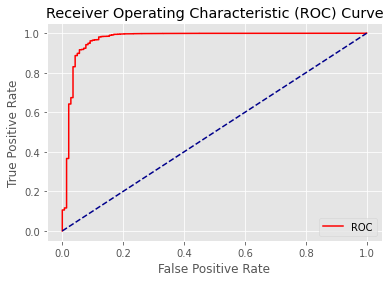

AUC is:  0.97


In [37]:
log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(Data_under_sampled, Class_under_sampled)
auc = calc_auc(log_reg)
print("AUC is: ",auc)

2. RANDOM FORESTS

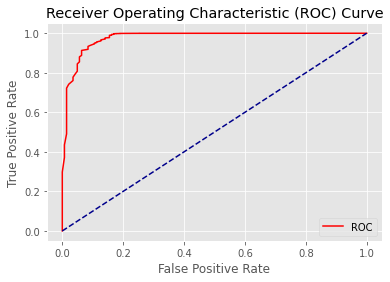

AUC is:  0.98


In [38]:
random_forest = RandomForestClassifier().fit(Data_under_sampled,Class_under_sampled)
auc = calc_auc(random_forest)
print("AUC is: ",auc)

3. K NEAREST NIGHBOURS

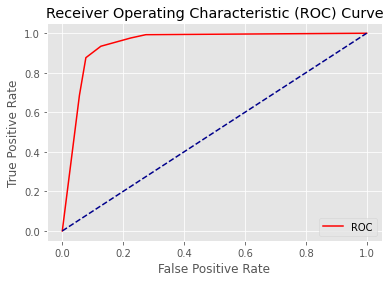

AUC is:  0.95


In [39]:
KNN_value = KNeighborsClassifier().fit(Data_under_sampled,Class_under_sampled)
auc = calc_auc(KNN_value)
print("AUC is: ",auc)

4. XG BOOST 

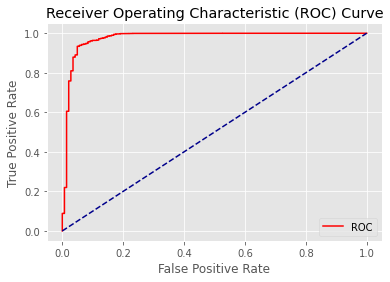

AUC is:  0.98


In [40]:
xgb_Boost = xgb.XGBClassifier().fit(Data_under_sampled,Class_under_sampled)
auc = calc_auc(xgb_Boost)
print("AUC is: ",auc)

# Which Algorithm performs the best!!

Using the right algorithm for predictions is very important. The accurate prediction of False Negatives and False Positives is a highly important factor in all fields, for example in the case of detection of a particular disease or in the detection of spam emails or in the detection of some documents as confidential or not confidential. Hence Machine Learning algorithms play a very important role.

We used total of four algorithms, the best performance is given by the algorithm getting the highest AUC. Therefore the accuracy of this algorithm in predicting whether a transaction is Fraudulent(True Positives) or Non Fraudulent(True Negatives) is the highest.
